In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
from scipy.stats import ttest_1samp, wilcoxon, shapiro
from statsmodels.stats.power import ttest_power


# One Sample Test

In [2]:
pwd C:\Users\ASUS\Desktop\great learning\week3

'C:\\Users\\ASUS\\Desktop\\great learning\\week3'

In [4]:
A=pd.read_csv('car_sales.csv',index_col=0)

In [5]:
A.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [6]:
A['Price'].describe()

count    93.000000
mean     19.509677
std       9.659430
min       7.400000
25%      12.200000
50%      17.700000
75%      23.300000
max      61.900000
Name: Price, dtype: float64

##  Steps to check if data is Normal

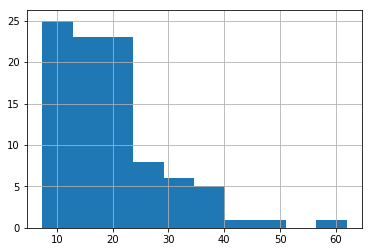

In [9]:
#STEP 1

A['Price'].hist(bins=10)

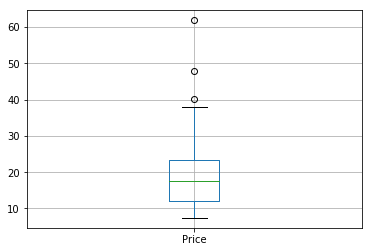

In [15]:
#STEP 2

A.boxplot(column='Price')

In [11]:
#STEP 3

shapiro(A['Price'])

# return value is (test statistic, p value)
# Ho---> A[price]  is normal
# Ha---> A[price] isnt normal
# here p value is >0.05, so Ho is false
# DATA IS NOT NORMAL

(0.8805127143859863, 4.2348321471763484e-07)

In [12]:
#Now we do log transform to make the data normal

import copy
B=copy.deepcopy(A) #or u can use b=A.copy()

In [16]:
B["Price"]= np.log(A['Price']) # natural log is used here

In [17]:
shapiro(B['Price'])

#as seen here p value is approx 0.32, which is greater than previous one and satisfies 
#normality condition

(0.9841008186340332, 0.3199950158596039)

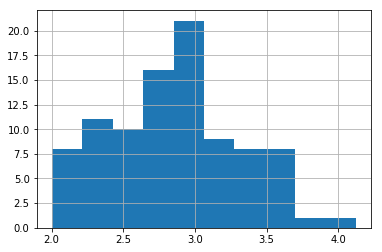

In [18]:
B['Price'].hist(bins=10)

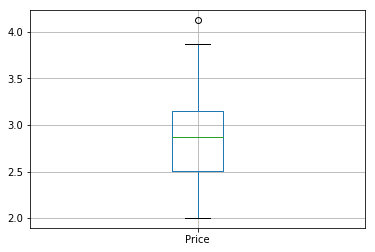

In [19]:
B.boxplot(column='Price')

But when u used log tranform you cannot compare the scale with scale of original data

In [20]:
A['Price'][:2] #initial value of price

1    15.9
2    33.9
Name: Price, dtype: float64

In [21]:
B['Price'][:2] # log transformed value

1    2.766319
2    3.523415
Name: Price, dtype: float64

Now, to get the orignal value back from B, you have to do inverse log transform which is actually exponential, as shown below.

In [22]:
np.exp(B['Price'][:2])

1    15.9
2    33.9
Name: Price, dtype: float64

Suppose, i have negative value, so i cant directly log tranform it, first i have move it to the positive scale, then i will do log transform

In [23]:
np.log(-1)

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


nan

First, we have to map it to positive value(0 to 1 scale)

If your data is uniformly distributed, you  cant log transform. You then perform Wilcoxon Test

We have in total 93 record, now we randomly pick 30 records out of the data and check if it is a good representation of your population=93.

In [79]:
import random
samp_data=random.sample(B["Price"].values.tolist(),30)

In [80]:
type(samp_data) #any column in the data is a series but here this random method does not work for 
# series , so random data comes as list.

list

In [81]:
samp_data

[2.128231705849268,
 2.5952547069568657,
 2.4069451083182885,
 3.481240089335692,
 2.424802725718295,
 2.0014800002101243,
 3.8691155044168695,
 2.7536607123542622,
 2.302585092994046,
 2.2823823856765264,
 2.760009940032921,
 2.4069451083182885,
 2.6461747973841225,
 3.5234150143864045,
 2.970414465569701,
 2.4336133554004498,
 3.0349529867072724,
 2.1972245773362196,
 3.5467396869528134,
 3.1484533605716547,
 2.9014215940827497,
 2.91235066461494,
 2.8735646395797834,
 2.424802725718295,
 2.714694743820879,
 3.250374491927572,
 2.803360380906535,
 2.766319109226186,
 2.9496883350525844,
 3.3568971227655755]

In [82]:
xbar= np.mean(samp_data)
xbar

2.795570504406173

In [31]:
np.exp(xbar) # mean in original scale for 30 random samples

16.59461807150164

In [32]:
B['Price'].describe()

count    93.000000
mean      2.865452
std       0.454686
min       2.001480
25%       2.501436
50%       2.873565
75%       3.148453
max       4.125520
Name: Price, dtype: float64

In [33]:
np.exp(2.865452)  # mean in original scale for population

17.55698716957607

In [43]:
mu=np.log(16)
mu

2.772588722239781

In [41]:
s=np.std(samp_data)
s

0.34356852954861167

In [65]:
tdata2= (xbar-mu)/(s/np.sqrt(30))

In [66]:
tdata2

0.5817248806671503

In [67]:
mu1=np.log(20)
tdata= (xbar-mu1)/(s/np.sqrt(30))

In [68]:
tdata

-2.9756660357005593

In [73]:
x= abs(tdata)

since are sample follows normal distribution so we do parametric t test

In [74]:
#one sample t test
# Ho: expected value= 2.975 which corresponds to 20 lacs
t_statistics, p_value=ttest_1samp(samp_data, x)
print(t_statistics, p_value)

-2.61112888145318 0.014139151187703078


In [83]:
#using 40 samples
samp_data=random.sample(B["Price"].values.tolist(),40)

In [84]:
xbar1= np.mean(samp_data)
xbar1

2.936002337900338

In [85]:
np.exp(xbar1)

18.84037809908394

In [86]:
s1=np.std(samp_data)
s1

0.4765673734143479

In [90]:
tdata3= (xbar1-3.5)/(s/np.sqrt(40))

In [91]:
C=[24,25,24,23,24,25,30]

In [93]:
C

[24, 25, 24, 23, 24, 25, 30]

In [94]:
xbarc= np.mean(C)

In [95]:
sc=np.std(C)


In [96]:
shapiro(C)


(0.7217678427696228, 0.0063759502954781055)

In [97]:
D=[24,25,24,23,24,25]
shapiro(D)

(0.8662614226341248, 0.2117050290107727)

In [101]:
t_statistics, p_value=ttest_1samp(D, 25)
print(t_statistics, p_value)

-2.711630722733198 0.04219399670552458


This means the sample isnt a true representation of the population as p value=0.0421<0.05, now lets try with 24

In [102]:
t_statistics, p_value=ttest_1samp(D, 24)
print(t_statistics, p_value)

0.5423261445466443 0.6108811833962531


In [103]:
t_statistics, p_value=ttest_1samp(C, 24)
print(t_statistics, p_value)

1.1456439237389602 0.29557245162157736


Even when i add a large value of 30, it will still satisfy for 24

In [105]:
#now we calculate the true mean
age=[24,24,25,24,24,22,21,24,24,24,24,24,23,21,21,25,23,23,24,22,22,30,25]
np.mean(age)

23.608695652173914

we expected 24, and the true mean is 23.6

###  Non Parametric Test

In [108]:
t_statistics, p_value=ttest_1samp(age, 24)
print(t_statistics, p_value)

-0.9999999999999978 0.3281832618806717


In [107]:
#one sample willcoxon
z_statistics, p_value=wilcoxon(np.array(age)-24) #here wilcocon doesnt take a list value so we are 
#type casting using np.array
print(z_statistics, p_value)

23.5 0.11921634485454125


for non parametric test your p value is always less than that of parametric test,
this means non parametric test is a harsh test. Here, the value is closer to being less than 0.05. This means chances of the data being rejected is more, Data will not easily pass through this test.

### Calculating Power of test
 in ttest_power the first arguement we pass is the delta value, ie, delta= ybar- mu/s
 1. compute the difference in mean between population and sample and divide  it by standard deviatiom
 2. Set number of observations
 3. set the alpha value and alternative value as "Two sided" "Larger" "Small" 

In [123]:
delta=(np.mean(age)-24)/np.std(age)
print(delta)
print(len(age))

-0.21320071635560991
23


In [111]:
pot=ttest_power(delta, nobs=23, alpha=0.05, alternative='two-sided')

In [112]:
print(pot)

0.16478635473497938


In [116]:
b=np.sort(age)
b

array([21, 21, 21, 22, 22, 22, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24,
       24, 24, 25, 25, 25, 30])

In [118]:
Median= b[12]
Median

24

C:\Users\ASUS\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


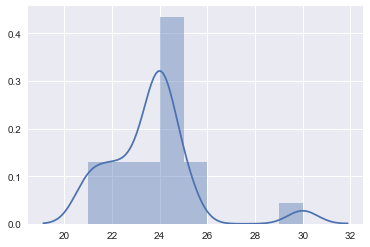

In [126]:
sns.distplot(age)